In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

In [2]:
import matplotlib as mpl
from scipy import linalg

def plot_ellipse(splot, mean, cov, color, alpha=0.2, label=None):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(alpha)
    splot.add_artist(ell)
    #splot.set_xticks(())
    #splot.set_yticks(())

In [19]:
data = pd.read_csv('german_credit.csv')

In [20]:
data.head()

,status,duration,history,purpose,amount,savings,employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_under_maintenance,telephone,foreign_worker,default
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,1,1,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,0,1,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,0,1,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,0,1,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,0,1,1


In [4]:
continuous = ['amount', 'age']

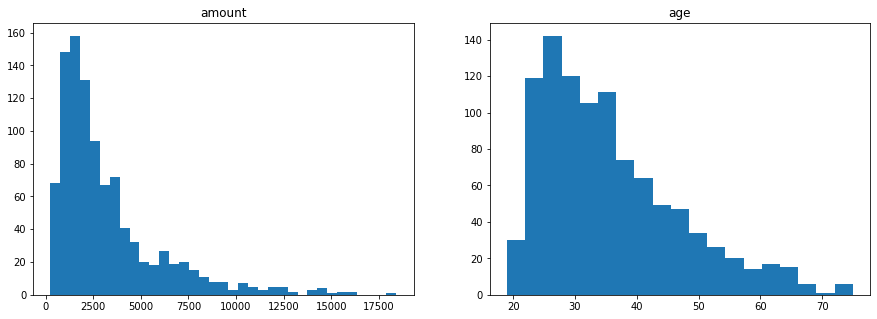

In [5]:
X = data.loc[:, continuous]

plt.figure(figsize=(15, 5))
for i, predictor in enumerate(continuous):
    plt.subplot(1, 2, i + 1)
    plt.hist(X.loc[:, predictor], bins='auto')
    plt.title(predictor)

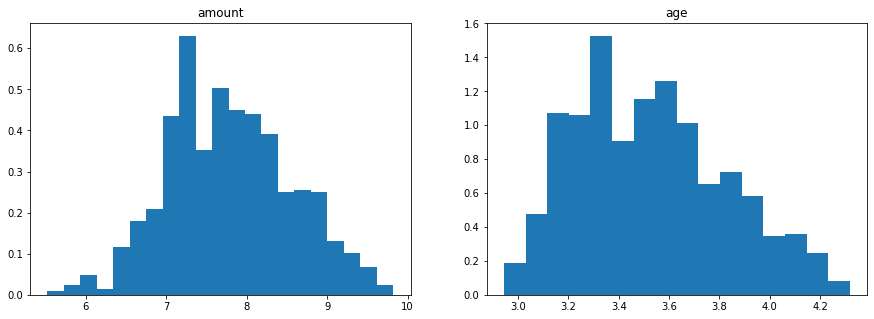

In [6]:
X_log = np.log(data.loc[:, continuous])
Y = data.loc[:, 'default']

plt.figure(figsize=(15, 5))
for i, predictor in enumerate(continuous):
    plt.subplot(1, 2, i + 1)
    plt.hist(X_log.loc[:, predictor], bins='auto', density=True)
    plt.title(predictor)

In [7]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: int64

In [8]:
# Class conditional covariance
np.cov(X_log.loc[Y == 0], rowvar=False)

array([[ 0.53962605, -0.00426723],
       [-0.00426723,  0.08797428]])

In [9]:
# Class conditional mean
np.mean(X_log.loc[Y == 0])

amount    7.733022
age       3.544456
dtype: float64

In [10]:
# Class conditional covariance
np.cov(X_log.loc[Y == 1], rowvar=False)

array([[0.72869396, 0.03767439],
       [0.03767439, 0.09136124]])

In [11]:
# Class conditional mean
np.mean(X_log.loc[Y == 1])

amount    7.918585
age       3.477287
dtype: float64

In [12]:
P = {}

In [13]:
P["X | Y=0"] =  multivariate_normal(mean=np.mean(X_log.loc[Y == 0]),
                                    cov=np.cov(X_log.loc[Y == 0], rowvar=False))

P["X | Y=1"] =  multivariate_normal(mean=np.mean(X_log.loc[Y == 1]),
                                    cov=np.cov(X_log.loc[Y == 1], rowvar=False))

P["Y=0"] = np.mean(Y == 0)
P["Y=1"] = np.mean(Y == 1)

In [14]:
x = [8.5, 3.4]

In [15]:
P["X | Y=0"].pdf(x) * P["Y=0"]

0.2659318032881597

In [16]:
P["X | Y=1"].pdf(x) * P["Y=1"]

0.13907421292768693

# QDA - Different Covariance

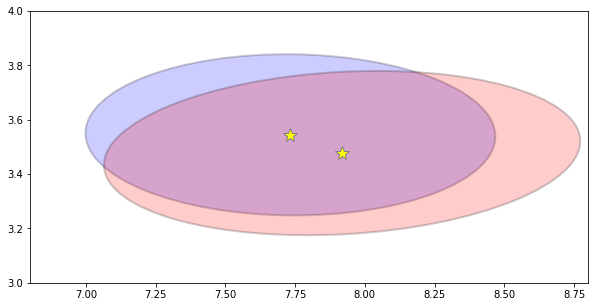

In [17]:
plt.figure(figsize=(10, 5))
subplot = plt.subplot(1, 1, 1)

# Y = 0
plot_ellipse(subplot, 
             np.mean(X_log.loc[Y == 0]), 
             np.cov(X_log.loc[Y == 0], rowvar=False), 
             'blue')
plt.plot(*np.mean(X_log.loc[Y == 0]), '*', color='yellow', markersize=15, markeredgecolor='grey')

# Y = 1
plot_ellipse(subplot, 
             np.mean(X_log.loc[Y == 1]), 
             np.cov(X_log.loc[Y == 1], rowvar=False), 
             'red')
plt.plot(*np.mean(X_log.loc[Y == 1]), '*', color='yellow', markersize=15, markeredgecolor='grey')

plt.xlim(6.8, 8.8)
plt.ylim(3, 4);

# LDA - Same Covariance

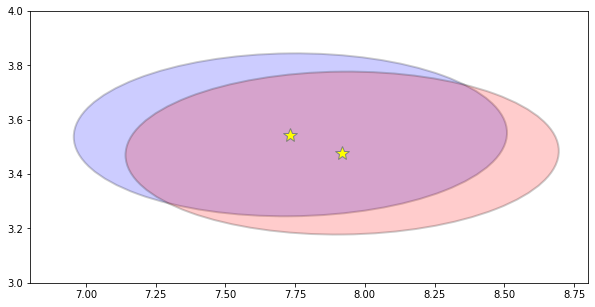

In [18]:
plt.figure(figsize=(10, 5))
subplot = plt.subplot(1, 1, 1)

# Y = 0
plot_ellipse(subplot, 
             np.mean(X_log.loc[Y == 0]), 
             np.cov(X_log, rowvar=False), 
             'blue')
plt.plot(*np.mean(X_log.loc[Y == 0]), '*', color='yellow', markersize=15, markeredgecolor='grey')

plot_ellipse(subplot, 
             np.mean(X_log.loc[Y == 1]), 
             np.cov(X_log, rowvar=False), 
             'red')
plt.plot(*np.mean(X_log.loc[Y == 1]), '*', color='yellow', markersize=15, markeredgecolor='grey')

plt.xlim(6.8, 8.8)
plt.ylim(3, 4);